# Install Requirements

In [1]:
!pip install bs4
!pip install goose-extractor
!pip install wordcloud

from bs4 import BeautifulSoup
from goose import Goose
from wordcloud import WordCloud

import matplotlib.pyplot as plt

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Parse the html for links, download texts and plot word cloud

In [13]:
# Obtain HTML for all books from from https://fourminutebooks.com/book-summaries/ (can also retrieve this via requests and parse)
page_html = '''
<ul><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/10-days-to-faster-reading-summary/" title="View 10 Days To Faster Reading Summary">10 Days To Faster Reading Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/10-happier-summary/" title="View 10% Happier Summary">10% Happier Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/12-rules-for-life-summary/" title="View 12 Rules For Life Summary">12 Rules For Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/13-things-mentally-strong-people-dont-do-summary/" title="View 13 Things Mentally Strong People Don’t Do Summary">13 Things Mentally Strong People Don’t Do Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/21-days-to-a-big-idea-summary/" title="View 21 Days To A Big Idea Summary">21 Days To A Big Idea Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/21-lessons-for-the-21st-century-summary/" title="View 21 Lessons For The 21st Century Summary">21 Lessons For The 21st Century Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/59-seconds-summary/" title="View 59 Seconds Summary">59 Seconds Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-brief-history-of-time-summary/" title="View A Brief History Of Time Summary">A Brief History Of Time Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-curious-mind-summary/" title="View A Curious Mind Summary">A Curious Mind Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-force-for-good-summary/" title="View A Force For Good Summary">A Force For Good Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-guide-to-the-good-life-summary/" title="View A Guide To The Good Life Summary">A Guide To The Good Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-new-earth-summary/" title="View A New Earth Summary">A New Earth Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-short-history-of-nearly-everything-summary/" title="View A Short History Of Nearly Everything Summary">A Short History Of Nearly Everything Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-splendid-exchange-summary/" title="View A Splendid Exchange Summary">A Splendid Exchange Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/a-year-with-peter-drucker-summary/" title="View A Year With Peter Drucker Summary">A Year With Peter Drucker Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/abundance-summary/" title="View Abundance Summary">Abundance Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/accidental-genius-summary/" title="View Accidental Genius Summary">Accidental Genius Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/alexander-the-great-summary/" title="View Alexander The Great Summary">Alexander The Great Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/algorithms-to-live-by-summary/" title="View Algorithms To Live By Summary">Algorithms To Live By Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/alibabas-world-summary/" title="View Alibaba’s World Summary">Alibaba’s World Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/all-marketers-are-liars-summary/" title="View All Marketers Are Liars Summary">All Marketers Are Liars Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/amusing-ourselves-to-death-summary/" title="View Amusing Ourselves To Death Summary">Amusing Ourselves To Death Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/antifragile-summary/" title="View Antifragile Summary">Antifragile Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/anything-you-want-summary/" title="View Anything You Want Summary">Anything You Want Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/are-you-fully-charged-summary/" title="View Are You Fully Charged Summary">Are You Fully Charged Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/as-a-man-thinketh-summary/" title="View As A Man Thinketh Summary">As A Man Thinketh Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/at-home-summary/" title="View At Home Summary">At Home Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/atomic-habits-summary/" title="View Atomic Habits Summary">Atomic Habits Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/attached-summary/" title="View Attached Summary">Attached Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/awaken-the-giant-within-summary/" title="View Awaken The Giant Within Summary">Awaken The Giant Within Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/barking-up-the-wrong-tree-summary/" title="View Barking Up The Wrong Tree Summary">Barking Up The Wrong Tree Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/behind-the-cloud-summary/" title="View Behind The Cloud Summary">Behind The Cloud Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/benjamin-franklin-an-american-life-summary/" title="View Benjamin Franklin: An American Life Summary">Benjamin Franklin: An American Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/better-than-before-summary/" title="View Better Than Before Summary">Better Than Before Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/big-magic-summary/" title="View Big Magic Summary">Big Magic Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/bit-literacy-summary/" title="View Bit Literacy Summary">Bit Literacy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/black-box-thinking-summary/" title="View Black Box Thinking Summary">Black Box Thinking Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/blink-summary/" title="View Blink Summary">Blink Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/blitzscaling-summary/" title="View Blitzscaling Summary">Blitzscaling Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/bold-summary/" title="View Bold Summary">Bold Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/born-for-this-summary/" title="View Born For This Summary">Born For This Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/bounce-summary/" title="View Bounce Summary">Bounce Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/braving-the-wilderness-summary/" title="View Braving The Wilderness Summary">Braving The Wilderness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/breakfast-with-socrates-summary/" title="View Breakfast With Socrates Summary">Breakfast With Socrates Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/buddhas-brain-summary/" title="View Buddha’s Brain Summary">Buddha’s Brain Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/built-to-last-summary/" title="View Built To Last Summary">Built To Last Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/carrots-and-sticks-summary/" title="View Carrots And Sticks Summary">Carrots And Sticks Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/catch-me-if-you-can-summary/" title="View Catch Me If You Can Summary">Catch Me If You Can Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/chaos-monkeys-summary/" title="View Chaos Monkeys Summary">Chaos Monkeys Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/charlie-munger-summary/" title="View Charlie Munger Summary">Charlie Munger Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/choose-yourself-summary/" title="View Choose Yourself Summary">Choose Yourself Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/confessions-of-an-advertising-man-summary/" title="View Confessions Of An Advertising Man Summary">Confessions Of An Advertising Man Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/content-inc-summary/" title="View Content, Inc. Summary">Content, Inc. Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/creative-schools-summary/" title="View Creative Schools Summary">Creative Schools Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/creativity-inc-summary/" title="View Creativity, Inc. Summary">Creativity, Inc. Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/crossing-the-chasm-summary/" title="View Crossing The Chasm Summary">Crossing The Chasm Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/crush-it-summary/" title="View Crush It Summary">Crush It Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/crushing-it-summary/" title="View Crushing It Summary">Crushing It Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/dare-to-lead-summary/" title="View Dare To Lead Summary">Dare To Lead Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/daring-greatly-summary/" title="View Daring Greatly Summary">Daring Greatly Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/david-and-goliath-summary/" title="View David And Goliath Summary">David And Goliath Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/decisive-summary/" title="View Decisive Summary">Decisive Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/deep-work-summary/" title="View Deep Work Summary">Deep Work Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/delivering-happiness-summary/" title="View Delivering Happiness Summary">Delivering Happiness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/design-to-grow-summary/" title="View Design To Grow Summary">Design To Grow Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/disrupt-yourself-summary/" title="View Disrupt Yourself Summary">Disrupt Yourself Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/do-over-summary/" title="View Do Over Summary">Do Over Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/do-the-work-summary/" title="View Do The Work Summary">Do The Work Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/dont-sweat-the-small-stuff-summary/" title="View Don’t Sweat The Small Stuff Summary">Don’t Sweat The Small Stuff Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/doughnut-economics-summary/" title="View Doughnut Economics Summary">Doughnut Economics Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/drive-summary/" title="View Drive Summary">Drive Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/duct-tape-marketing-summary/" title="View Duct Tape Marketing Summary">Duct Tape Marketing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/eat-move-sleep-summary/" title="View Eat, Move, Sleep Summary">Eat, Move, Sleep Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/eat-that-frog-summary/" title="View Eat That Frog Summary">Eat That Frog Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/ego-is-the-enemy-summary/" title="View Ego Is The Enemy Summary">Ego Is The Enemy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/einstein-his-life-and-universe-summary/" title="View Einstein: His Life And Universe Summary">Einstein: His Life And Universe Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/elon-musk-summary/" title="View Elon Musk Summary">Elon Musk Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/emotional-agility-summary/" title="View Emotional Agility Summary">Emotional Agility Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/emotional-intelligence-summary/" title="View Emotional Intelligence Summary">Emotional Intelligence Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/ending-aging-summary/" title="View Ending Aging Summary">Ending Aging Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/enlightenment-now-summary/" title="View Enlightenment Now Summary">Enlightenment Now Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/essentialism-summary/" title="View Essentialism Summary">Essentialism Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/everything-i-know-summary/" title="View Everything I Know Summary">Everything I Know Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/everything-is-obvious-summary/" title="View Everything Is Obvious Summary">Everything Is Obvious Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/excellent-sheep-summary/" title="View Excellent Sheep Summary">Excellent Sheep Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/facebook-ads-manual-summary/" title="View Facebook Ads Manual Summary">Facebook Ads Manual Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/factfulness-summary/" title="View Factfulness Summary">Factfulness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/failing-forward-summary/" title="View Failing Forward Summary">Failing Forward Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/farmageddon-summary/" title="View Farmageddon Summary">Farmageddon Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/fast-food-nation-summary/" title="View Fast Food Nation Summary">Fast Food Nation Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/find-your-why-summary/" title="View Find Your Why Summary">Find Your Why Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/finding-my-virginity-summary/" title="View Finding My Virginity Summary">Finding My Virginity Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/finding-your-element-summary/" title="View Finding Your Element Summary">Finding Your Element Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/finish-summary/" title="View Finish Summary">Finish Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/fire-and-fury-summary/" title="View Fire And Fury Summary">Fire And Fury Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/first-bite-summary/" title="View First Bite Summary">First Bite Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/first-things-first-summary/" title="View First Things First Summary">First Things First Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/flourish-summary/" title="View Flourish Summary">Flourish Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/flow-summary/" title="View Flow Summary">Flow Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/focus-summary/" title="View Focus Summary">Focus Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/fooled-by-randomness-summary/" title="View Fooled By Randomness Summary">Fooled By Randomness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/forensics-the-anatomy-of-crime-summary/" title="View Forensics: The Anatomy Of Crime Summary">Forensics: The Anatomy Of Crime Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/freakonomics-summary/" title="View Freakonomics Summary">Freakonomics Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/free-the-future-of-a-radical-price-summary/" title="View Free: The Future Of A Radical Price Summary">Free: The Future Of A Radical Price Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/genius-the-life-and-science-of-richard-feynman-summary/" title="View Genius: The Life And Science Of Richard Feynman Summary">Genius: The Life And Science Of Richard Feynman Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/get-smart-summary/" title="View Get Smart Summary">Get Smart Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/getting-everything-you-can-out-of-all-youve-got-summary/" title="View Getting Everything You Can Out Of All You’ve Got Summary">Getting Everything You Can Out Of All You’ve Got Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/getting-things-done-summary/" title="View Getting Things Done Summary">Getting Things Done Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/ghettoside-summary/" title="View Ghettoside Summary">Ghettoside Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/give-and-take-summary/" title="View Give And Take Summary">Give And Take Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/good-to-great-summary/" title="View Good To Great Summary">Good To Great Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/grain-brain-summary/" title="View Grain Brain Summary">Grain Brain Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/great-by-choice-summary/" title="View Great By Choice Summary">Great By Choice Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/grit-summary/" title="View Grit Summary">Grit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/growth-hacker-marketing-summary/" title="View Growth Hacker Marketing Summary">Growth Hacker Marketing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/habits-of-a-happy-brain-summary/" title="View Habits Of A Happy Brain Summary">Habits Of A Happy Brain Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/hackers-and-painters-summary/" title="View Hackers And Painters Summary">Hackers And Painters Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/happier-at-home-summary/" title="View Happier At Home Summary">Happier At Home Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/happiness-summary/" title="View Happiness Summary">Happiness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/hardwiring-happiness-summary/" title="View Hardwiring Happiness Summary">Hardwiring Happiness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/hatching-twitter-summary/" title="View Hatching Twitter Summary">Hatching Twitter Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/homo-deus-summary/" title="View Homo Deus Summary">Homo Deus Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/hooked-summary/" title="View Hooked Summary">Hooked Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-google-works-summary/" title="View How Google Works Summary">How Google Works Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-not-to-be-wrong-summary/" title="View How Not To Be Wrong Summary">How Not To Be Wrong Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-successful-people-think-summary/" title="View How Successful People Think Summary">How Successful People Think Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-be-a-positive-leader-summary/" title="View How To Be A Positive Leader Summary">How To Be A Positive Leader Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-be-a-stoic-summary/" title="View How To Be A Stoic Summary">How To Be A Stoic Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-be-alone-summary/" title="View How To Be Alone Summary">How To Be Alone Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-become-a-straight%e2%80%91a-student-summary/" title="View How To Become A Straight A Student Summary">How To Become A Straight A Student Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-create-a-mind-summary/" title="View How To Create A Mind Summary">How To Create A Mind Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-fail-at-almost-everything-and-still-win-big-summary/" title="View How To Fail At Almost Everything And Still Win Big Summary">How To Fail At Almost Everything And Still Win Big Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-read-a-book-summary/" title="View How To Read A Book Summary">How To Read A Book Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-read-literature-like-a-professor-summary/" title="View How To Read Literature Like A Professor Summary">How To Read Literature Like A Professor Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-stop-worrying-and-start-living-summary/" title="View How To Stop Worrying And Start Living Summary">How To Stop Worrying And Start Living Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-talk-to-anyone-summary/" title="View How To Talk To Anyone Summary">How To Talk To Anyone Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-win-at-the-sport-of-business-summary/" title="View How To Win At The Sport Of Business Summary">How To Win At The Sport Of Business Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-to-win-friends-and-influence-people-summary/" title="View How To Win Friends And Influence People Summary">How To Win Friends And Influence People Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-we-got-to-now-summary/" title="View How We Got To Now Summary">How We Got To Now Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-we-learn-summary/" title="View How We Learn Summary">How We Learn Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/how-will-you-measure-your-life-summary/" title="View How Will You Measure Your Life Summary">How Will You Measure Your Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/howard-hughes-his-life-and-madness-summary/" title="View Howard Hughes: His Life And Madness Summary">Howard Hughes: His Life And Madness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/humans-are-underrated-summary/" title="View Humans Are Underrated Summary">Humans Are Underrated Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/i-thought-it-was-just-me-summary/" title="View I Thought It Was Just Me Summary">I Thought It Was Just Me Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/i-wear-the-black-hat-summary/" title="View I Wear The Black Hat Summary">I Wear The Black Hat Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/i-will-teach-you-to-be-rich-summary/" title="View I Will Teach You To Be Rich Summary">I Will Teach You To Be Rich Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/if-youre-so-smart-why-arent-you-happy-summary/" title="View If You’re So Smart, Why Aren’t You Happy Summary">If You’re So Smart, Why Aren’t You Happy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/ignore-everybody-summary/" title="View Ignore Everybody Summary">Ignore Everybody Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/immunity-summary/" title="View Immunity Summary">Immunity Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/in-defense-of-food-summary/" title="View In Defense Of Food Summary">In Defense Of Food Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/influence-summary/" title="View Influence Summary">Influence Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/inventology-summary/" title="View Inventology Summary">Inventology Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/iwoz-summary/" title="View iWoz Summary">iWoz Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/jab-jab-jab-right-hook-summary/" title="View Jab, Jab, Jab, Right Hook Summary">Jab, Jab, Jab, Right Hook Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/labor-of-love-summary/" title="View Labor Of Love Summary">Labor Of Love Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/launch-summary/" title="View Launch Summary">Launch Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/leaders-eat-last-summary/" title="View Leaders Eat Last Summary">Leaders Eat Last Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/lean-analytics-summary/" title="View Lean Analytics Summary">Lean Analytics Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/lean-in-summary/" title="View Lean In Summary">Lean In Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/learned-optimism-summary/" title="View Learned Optimism Summary">Learned Optimism Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/leonardo-da-vinci-summary/" title="View Leonardo Da Vinci Summary">Leonardo Da Vinci Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/less-doing-more-living-summary/" title="View Less Doing More Living Summary">Less Doing More Living Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/letters-from-a-stoic-summary/" title="View Letters From A Stoic Summary">Letters From A Stoic Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/linchpin-summary/" title="View Linchpin Summary">Linchpin Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/long-term-thinking-for-a-short-sighted-world-summary/" title="View Long-Term Thinking For A Short-Sighted World Summary">Long-Term Thinking For A Short-Sighted World Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/long-walk-to-freedom-summary/" title="View Long Walk To Freedom Summary">Long Walk To Freedom Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/losing-my-virginity-summary/" title="View Losing My Virginity Summary">Losing My Virginity Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/loving-what-is-summary/" title="View Loving What Is Summary">Loving What Is Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/made-to-stick-summary/" title="View Made To Stick Summary">Made To Stick Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/make-a-killing-on-kindle-summary/" title="View Make A Killing On Kindle Summary">Make A Killing On Kindle Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/make-time-summary/" title="View Make Time Summary">Make Time Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/make-your-mark-summary/" title="View Make Your Mark Summary">Make Your Mark Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/making-ideas-happen-summary/" title="View Making Ideas Happen Summary">Making Ideas Happen Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mans-search-for-meaning-summary/" title="View Man’s Search For Meaning Summary">Man’s Search For Meaning Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mastery-summary/" title="View Mastery Summary">Mastery Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/meditations-on-first-philosophy-summary/" title="View Meditations On First Philosophy Summary">Meditations On First Philosophy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/meditations-summary/" title="View Meditations Summary">Meditations Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/million-dollar-consulting-summary/" title="View Million Dollar Consulting Summary">Million Dollar Consulting Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mind-gym-summary/" title="View Mind Gym Summary">Mind Gym Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mindset-summary/" title="View Mindset Summary">Mindset Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mindsight-summary/" title="View Mindsight Summary">Mindsight Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mini-habits-summary/" title="View Mini Habits Summary">Mini Habits Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/minimalism-summary/" title="View Minimalism Summary">Minimalism Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/mistakes-were-made-but-not-by-me-summary/" title="View Mistakes Were Made, But Not By Me Summary">Mistakes Were Made, But Not By Me Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/money-master-the-game-summary/" title="View Money Master The Game Summary">Money Master The Game Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/moonshot-summary/" title="View Moonshot Summary">Moonshot Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/moonwalking-with-einstein-summary/" title="View Moonwalking With Einstein Summary">Moonwalking With Einstein Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/move-your-bus-summary/" title="View Move Your Bus Summary">Move Your Bus Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/napoleon-the-great-summary/" title="View Napoleon The Great Summary">Napoleon The Great Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/never-eat-alone-summary/" title="View Never Eat Alone Summary">Never Eat Alone Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/nobody-wants-to-read-your-sht-summary/" title="View Nobody Wants to Read Your Sh*t Summary">Nobody Wants to Read Your Sh*t Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/nudge-summary/" title="View Nudge Summary">Nudge Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/on-liberty-summary/" title="View On Liberty Summary">On Liberty Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/on-the-shortness-of-life-summary/" title="View On The Shortness Of Life Summary">On The Shortness Of Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/one-simple-idea-summary/" title="View One Simple Idea Summary">One Simple Idea Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/option-b-summary/" title="View Option B Summary">Option B Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/originals-summary/" title="View Originals Summary">Originals Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/out-of-our-minds-summary/" title="View Out Of Our Minds Summary">Out Of Our Minds Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/outliers-summary/" title="View Outliers Summary">Outliers Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/outwitting-the-devil-summary/" title="View Outwitting The Devil Summary">Outwitting The Devil Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/own-the-day-own-your-life-summary/" title="View Own The Day, Own Your Life Summary">Own The Day, Own Your Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/oxygen-summary/" title="View Oxygen Summary">Oxygen Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/payoff-summary/" title="View Payoff Summary">Payoff Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/peak-how-great-companies-get-their-mojo-from-maslow-summary/" title="View Peak: How Great Companies Get Their Mojo From Maslow Summary">Peak: How Great Companies Get Their Mojo From Maslow Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/peak-summary/" title="View Peak Summary">Peak Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/people-over-profit-summary/" title="View People Over Profit Summary">People Over Profit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/permission-marketing-summary/" title="View Permission Marketing Summary">Permission Marketing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/pitch-anything-summary/" title="View Pitch Anything Summary">Pitch Anything Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/plato-at-the-googleplex-summary/" title="View Plato At The Googleplex Summary">Plato At The Googleplex Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/pre-suasion-summary/" title="View Pre-Suasion Summary">Pre-Suasion Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/predictable-success-summary/" title="View Predictable Success Summary">Predictable Success Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/predictably-irrational-summary/" title="View Predictably Irrational Summary">Predictably Irrational Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/principles-summary/" title="View Principles Summary">Principles Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/problem-solving-101-summary/" title="View Problem Solving 101 Summary">Problem Solving 101 Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/purple-cow-summary/" title="View Purple Cow Summary">Purple Cow Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/quiet-summary/" title="View Quiet Summary">Quiet Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/quitter-summary/" title="View Quitter Summary">Quitter Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/reading-like-a-writer-summary/" title="View Reading Like A Writer Summary">Reading Like A Writer Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/real-artists-dont-starve-summary/" title="View Real Artists Don’t Starve Summary">Real Artists Don’t Starve Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/reality-is-broken-summary/" title="View Reality Is Broken Summary">Reality Is Broken Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/reinvent-yourself-summary/" title="View Reinvent Yourself Summary">Reinvent Yourself Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rejection-proof-summary/" title="View Rejection Proof Summary">Rejection Proof Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/remote-summary/" title="View Remote Summary">Remote Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rewire-summary/" title="View Rewire Summary">Rewire Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rework-summary/" title="View ReWork Summary">ReWork Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rich-dad-poor-dad-summary/" title="View Rich Dad Poor Dad Summary">Rich Dad Poor Dad Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rising-strong-summary/" title="View Rising Strong Summary">Rising Strong Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rookie-smarts-summary/" title="View Rookie Smarts Summary">Rookie Smarts Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/rule-1-summary/" title="View Rule #1 Summary">Rule #1 Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/salt-sugar-fat-summary/" title="View Salt Sugar Fat Summary">Salt Sugar Fat Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/sam-walton-made-in-america-summary/" title="View Sam Walton: Made In America Summary">Sam Walton: Made In America Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/second-chance-summary/" title="View Second Chance Summary">Second Chance Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/secrets-of-the-millionaire-mind-summary/" title="View Secrets Of The Millionaire Mind Summary">Secrets Of The Millionaire Mind Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/sex-at-dawn-summary/" title="View Sex At Dawn Summary">Sex At Dawn Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/shoe-dog-summary/" title="View Shoe Dog Summary">Shoe Dog Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/side-hustle-summary/" title="View Side Hustle Summary">Side Hustle Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/simple-rules-summary/" title="View Simple Rules Summary">Simple Rules Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/singletasking-summary/" title="View Singletasking Summary">Singletasking Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/six-thinking-hats-summary/" title="View Six Thinking Hats Summary">Six Thinking Hats Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/skin-in-the-game-summary/" title="View Skin In The Game Summary">Skin In The Game Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/smart-people-should-build-things-summary/" title="View Smart People Should Build Things Summary">Smart People Should Build Things Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/smartcuts-summary/" title="View Smartcuts Summary">Smartcuts Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/smarter-faster-better-summary/" title="View Smarter Faster Better Summary">Smarter Faster Better Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/smarter-summary/" title="View Smarter Summary">Smarter Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/so-good-they-cant-ignore-you-summary/" title="View So Good They Can’t Ignore You Summary">So Good They Can’t Ignore You Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/solve-for-happy-summary/" title="View Solve For Happy Summary">Solve For Happy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/spartan-up-summary/" title="View Spartan Up Summary">Spartan Up Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/sprint-summary/" title="View Sprint Summary">Sprint Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/start-summary/" title="View Start Summary">Start Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/start-up-nation-summary/" title="View Start-Up Nation Summary">Start-Up Nation Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/start-with-why-summary/" title="View Start With Why Summary">Start With Why Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/startup-growth-engines-summary/" title="View Startup Growth Engines Summary">Startup Growth Engines Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/steal-like-an-artist-summary/" title="View Steal Like An Artist Summary">Steal Like An Artist Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/steve-jobs-summary/" title="View Steve Jobs Summary">Steve Jobs Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/strengthsfinder-2-0-summary/" title="View Strengthsfinder 2.0 Summary">Strengthsfinder 2.0 Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/stumbling-on-happiness-summary/" title="View Stumbling On Happiness Summary">Stumbling On Happiness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/superbetter-summary/" title="View Superbetter Summary">Superbetter Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/superfreakonomics-summary/" title="View Superfreakonomics Summary">Superfreakonomics Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/superintelligence-summary/" title="View Superintelligence Summary">Superintelligence Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/switch-summary/" title="View Switch Summary">Switch Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/talent-is-overrated-summary/" title="View Talent Is Overrated Summary">Talent Is Overrated Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/talk-like-ted-summary/" title="View Talk Like Ted Summary">Talk Like Ted Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/ted-talks-summary/" title="View TED Talks Summary">TED Talks Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-100-startup-summary/" title="View The $100 Startup Summary">The $100 Startup Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-10x-rule-summary/" title="View The 10X Rule Summary">The 10X Rule Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-21-irrefutable-laws-of-leadership-summary/" title="View The 21 Irrefutable Laws Of Leadership Summary">The 21 Irrefutable Laws Of Leadership Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-22-immutable-laws-of-marketing-summary/" title="View The 22 Immutable Laws Of Marketing Summary">The 22 Immutable Laws Of Marketing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-4-hour-body-summary/" title="View The 4-Hour Body Summary">The 4-Hour Body Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-4-hour-workweek-summary/" title="View The 4-Hour Workweek Summary">The 4-Hour Workweek Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-48-laws-of-power-summary/" title="View The 48 Laws Of Power Summary">The 48 Laws Of Power Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-5-second-rule-summary/" title="View The 5 Second Rule Summary">The 5 Second Rule Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-7-habits-of-highly-effective-people-summary/" title="View The 7 Habits Of Highly Effective People Summary">The 7 Habits Of Highly Effective People Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-80-20-principle-summary/" title="View The 80/20 Principle Summary">The 80/20 Principle Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-8th-habit-summary/" title="View The 8th Habit Summary">The 8th Habit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-achievement-habit-summary/" title="View The Achievement Habit Summary">The Achievement Habit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-adhd-advantage-summary/" title="View The ADHD Advantage Summary">The ADHD Advantage Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-asking-summary/" title="View The Art Of Asking Summary">The Art Of Asking Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-choosing-summary/" title="View The Art Of Choosing Summary">The Art Of Choosing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-happiness-summary/" title="View The Art Of Happiness Summary">The Art Of Happiness Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-learning-summary/" title="View The Art Of Learning Summary">The Art Of Learning Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-non-conformity-summary/" title="View The Art Of Non-Conformity Summary">The Art Of Non-Conformity Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-seduction-summary/" title="View The Art Of Seduction Summary">The Art Of Seduction Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-social-media-summary/" title="View The Art Of Social Media Summary">The Art Of Social Media Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-travel-summary/" title="View The Art Of Travel Summary">The Art Of Travel Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-war-summary/" title="View The Art Of War Summary">The Art Of War Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-art-of-work-summary/" title="View The Art Of Work Summary">The Art Of Work Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-artists-way-summary/" title="View The Artist’s Way Summary">The Artist’s Way Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-audacity-of-hope-summary/" title="View The Audacity Of Hope Summary">The Audacity Of Hope Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-autobiography-of-malcolm-x-summary/" title="View The Autobiography Of Malcolm X Summary">The Autobiography Of Malcolm X Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-automatic-millionaire-summary/" title="View The Automatic Millionaire Summary">The Automatic Millionaire Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-barefoot-investor-summary/" title="View The Barefoot Investor Summary">The Barefoot Investor Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-better-angels-of-our-nature-summary/" title="View The Better Angels Of Our Nature Summary">The Better Angels Of Our Nature Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-big-leap-summary/" title="View The Big Leap Summary">The Big Leap Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-black-swan-summary/" title="View The Black Swan Summary">The Black Swan Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-blue-zones-summary/" title="View The Blue Zones Summary">The Blue Zones Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-book-of-joy-summary/" title="View The Book Of Joy Summary">The Book Of Joy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-botany-of-desire-summary/" title="View The Botany Of Desire Summary">The Botany Of Desire Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-bulletproof-diet-summary/" title="View The Bulletproof Diet Summary">The Bulletproof Diet Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-chimp-paradox-summary/" title="View The Chimp Paradox Summary">The Chimp Paradox Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-china-study-summary/" title="View The China Study Summary">The China Study Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-code-of-the-extraordinary-mind-summary/" title="View The Code Of The Extraordinary Mind Summary">The Code Of The Extraordinary Mind Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-compound-effect-summary/" title="View The Compound Effect Summary">The Compound Effect Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-courage-to-be-disliked-summary/" title="View The Courage To Be Disliked Summary">The Courage To Be Disliked Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-creative-habit-summary/" title="View The Creative Habit Summary">The Creative Habit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-culture-code-summary/" title="View The Culture Code Summary">The Culture Code Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-da-vinci-curse-summary/" title="View The Da Vinci Curse Summary">The Da Vinci Curse Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-desire-map-summary/" title="View The Desire Map Summary">The Desire Map Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-e-myth-revisited-summary/" title="View The E-Myth Revisited Summary">The E-Myth Revisited Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-education-of-a-value-investor-summary/" title="View The Education Of A Value Investor Summary">The Education Of A Value Investor Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-end-of-average-summary/" title="View The End Of Average Summary">The End Of Average Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-end-of-jobs-summary/" title="View The End of Jobs Summary">The End of Jobs Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-end-of-stress-summary/" title="View The End Of Stress Summary">The End Of Stress Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-energy-bus-summary/" title="View The Energy Bus Summary">The Energy Bus Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-eureka-factor-summary/" title="View The Eureka Factor Summary">The Eureka Factor Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-everything-store-summary/" title="View The Everything Store Summary">The Everything Store Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-evolution-of-everything-summary/" title="View The Evolution Of Everything Summary">The Evolution Of Everything Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-facebook-effect-summary/" title="View The Facebook Effect Summary">The Facebook Effect Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-fifth-agreement-summary/" title="View The Fifth Agreement Summary">The Fifth Agreement Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-first-20-hours-summary/" title="View The First 20 Hours Summary">The First 20 Hours Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-fortune-cookie-principle-summary/" title="View The Fortune Cookie Principle Summary">The Fortune Cookie Principle Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-four-agreements-summary/" title="View The Four Agreements Summary">The Four Agreements Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-four-tendencies-summary/" title="View The Four Tendencies Summary">The Four Tendencies Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-freaks-shall-inherit-the-earth-summary/" title="View The Freaks Shall Inherit The Earth Summary">The Freaks Shall Inherit The Earth Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-game-summary/" title="View The Game Summary">The Game Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-genius-of-birds-summary/" title="View The Genius Of Birds Summary">The Genius Of Birds Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-geography-of-genius-summary/" title="View The Geography Of Genius Summary">The Geography Of Genius Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-gifts-of-imperfection-summary/" title="View The Gifts Of Imperfection Summary">The Gifts Of Imperfection Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-greatest-salesman-in-the-world-summary/" title="View The Greatest Salesman In The World Summary">The Greatest Salesman In The World Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-habit-blueprint-summary/" title="View The Habit Blueprint Summary">The Habit Blueprint Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-happiness-advantage-summary/" title="View The Happiness Advantage Summary">The Happiness Advantage Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-happiness-equation-summary/" title="View The Happiness Equation Summary">The Happiness Equation Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-happiness-hypothesis-summary/" title="View The Happiness Hypothesis Summary">The Happiness Hypothesis Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-happiness-of-pursuit-summary/" title="View The Happiness Of Pursuit Summary">The Happiness Of Pursuit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-happiness-project-summary/" title="View The Happiness Project Summary">The Happiness Project Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-hard-thing-about-hard-things-summary/" title="View The Hard Thing About Hard Things Summary">The Hard Thing About Hard Things Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-honest-truth-about-dishonesty-summary/" title="View The Honest Truth About Dishonesty Summary">The Honest Truth About Dishonesty Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-house-of-rothschild-summary/" title="View The House Of Rothschild Summary">The House Of Rothschild Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-idea-factory-summary/" title="View The Idea Factory Summary">The Idea Factory Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-in-between-summary/" title="View The In-Between Summary">The In-Between Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-inner-game-of-tennis-summary/" title="View The Inner Game Of Tennis Summary">The Inner Game Of Tennis Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-innovators-dilemma-summary/" title="View The Innovator’s Dilemma Summary">The Innovator’s Dilemma Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-innovators-summary/" title="View The Innovators Summary">The Innovators Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-intelligent-investor-summary/" title="View The Intelligent Investor Summary">The Intelligent Investor Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-interpretation-of-dreams-summary/" title="View The Interpretation Of Dreams Summary">The Interpretation Of Dreams Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-language-instinct-summary/" title="View The Language Instinct Summary">The Language Instinct Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-laws-of-human-nature-summary/" title="View The Laws Of Human Nature Summary">The Laws Of Human Nature Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-lean-startup-summary/" title="View The Lean Startup Summary">The Lean Startup Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-lessons-of-history-summary/" title="View The Lessons Of History Summary">The Lessons Of History Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-life-changing-magic-of-not-giving-a-fck-summary/" title="View The Life-Changing Magic Of Not Giving A F*ck Summary">The Life-Changing Magic Of Not Giving A F*ck Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-life-changing-magic-of-tidying-up-summary/" title="View The Life-Changing Magic Of Tidying Up Summary">The Life-Changing Magic Of Tidying Up Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-little-book-of-common-sense-investing-summary/" title="View The Little Book of Common Sense Investing Summary">The Little Book of Common Sense Investing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-little-book-of-hygge-summary/" title="View The Little Book Of Hygge Summary">The Little Book Of Hygge Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-little-book-that-still-beats-the-market-summary/" title="View The Little Book That Still Beats The Market Summary">The Little Book That Still Beats The Market Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-long-tail-summary/" title="View The Long Tail Summary">The Long Tail Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-longevity-project-summary/" title="View The Longevity Project Summary">The Longevity Project Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-magic-of-math-summary/" title="View The Magic Of Math Summary">The Magic Of Math Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-magic-of-reality-summary/" title="View The Magic Of Reality Summary">The Magic Of Reality Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-magic-of-thinking-big-summary/" title="View The Magic of Thinking Big Summary">The Magic of Thinking Big Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-man-who-fed-the-world-summary/" title="View The Man Who Fed The World Summary">The Man Who Fed The World Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-millionaire-fastlane-summary/" title="View The Millionaire Fastlane Summary">The Millionaire Fastlane Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-millionaire-next-door-summary/" title="View The Millionaire Next Door Summary">The Millionaire Next Door Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-millionaire-real-estate-agent-summary/" title="View The Millionaire Real Estate Agent Summary">The Millionaire Real Estate Agent Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-miracle-morning-summary/" title="View The Miracle Morning Summary">The Miracle Morning Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-monk-who-sold-his-ferrari-summary/" title="View The Monk Who Sold His Ferrari Summary">The Monk Who Sold His Ferrari Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-myth-of-multitasking-summary/" title="View The Myth Of Multitasking Summary">The Myth Of Multitasking Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-new-trading-for-a-living-summary/" title="View The New Trading For A Living Summary">The New Trading For A Living Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-now-habit-summary/" title="View The Now Habit Summary">The Now Habit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-obstacle-is-the-way-summary/" title="View The Obstacle Is The Way Summary">The Obstacle Is The Way Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-omnivores-dilemma-summary/" title="View The Omnivore’s Dilemma Summary">The Omnivore’s Dilemma Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-one-minute-manager-summary/" title="View The One Minute Manager Summary">The One Minute Manager Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-one-page-financial-plan-summary/" title="View The One-Page Financial Plan Summary">The One-Page Financial Plan Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-one-thing-summary/" title="View The ONE Thing Summary">The ONE Thing Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-opposite-of-spoiled-summary/" title="View The Opposite Of Spoiled Summary">The Opposite Of Spoiled Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-paradox-of-choice-summary/" title="View The Paradox Of Choice Summary">The Paradox Of Choice Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-personal-mba-summary/" title="View The Personal MBA Summary">The Personal MBA Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-pomodoro-technique-summary/" title="View The Pomodoro Technique Summary">The Pomodoro Technique Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-broke-summary/" title="View The Power Of Broke Summary">The Power Of Broke Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-full-engagement-summary/" title="View The Power Of Full Engagement Summary">The Power Of Full Engagement Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-habit-summary/" title="View The Power Of Habit Summary">The Power Of Habit Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-less-summary/" title="View The Power Of Less Summary">The Power Of Less Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-no-summary/" title="View The Power Of No Summary">The Power Of No Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-now-summary/" title="View The Power Of Now Summary">The Power Of Now Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-positive-thinking-summary/" title="View The Power Of Positive Thinking Summary">The Power Of Positive Thinking Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-starting-something-stupid-summary/" title="View The Power Of Starting Something Stupid Summary">The Power Of Starting Something Stupid Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-the-other-summary/" title="View The Power Of The Other Summary">The Power Of The Other Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-power-of-your-subconscious-mind-summary/" title="View The Power Of Your Subconscious Mind Summary">The Power Of Your Subconscious Mind Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-practicing-mind-summary/" title="View The Practicing Mind Summary">The Practicing Mind Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-prince-summary/" title="View The Prince Summary">The Prince Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-productivity-project-summary/" title="View The Productivity Project Summary">The Productivity Project Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-promise-of-a-pencil-summary/" title="View The Promise Of A Pencil Summary">The Promise Of A Pencil Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-psychology-of-winning-summary/" title="View The Psychology Of Winning Summary">The Psychology Of Winning Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-rebel-rules-summary/" title="View The Rebel Rules Summary">The Rebel Rules Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-republic-summary/" title="View The Republic Summary">The Republic Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-richest-man-in-babylon-summary/" title="View The Richest Man In Babylon Summary">The Richest Man In Babylon Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-rise-of-superman-summary/" title="View The Rise Of Superman Summary">The Rise Of Superman Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-road-less-traveled-summary/" title="View The Road Less Traveled Summary">The Road Less Traveled Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-secret-summary/" title="View The Secret Summary">The Secret Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-self-made-billionaire-effect-summary/" title="View The Self-Made Billionaire Effect Summary">The Self-Made Billionaire Effect Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-selfish-gene-summary/" title="View The Selfish Gene Summary">The Selfish Gene Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-seven-spiritual-laws-of-success-summary/" title="View The Seven Spiritual Laws Of Success Summary">The Seven Spiritual Laws Of Success Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-signal-and-the-noise-summary/" title="View The Signal And The Noise Summary">The Signal And The Noise Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-singularity-is-near-summary/" title="View The Singularity Is Near Summary">The Singularity Is Near Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-six-pillars-of-self-esteem-summary/" title="View The Six Pillars Of Self-Esteem Summary">The Six Pillars Of Self-Esteem Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-sleep-revolution-summary/" title="View The Sleep Revolution Summary">The Sleep Revolution Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-snowball-summary/" title="View The Snowball Summary">The Snowball Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-speed-of-trust-summary/" title="View The Speed Of Trust Summary">The Speed Of Trust Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-subtle-art-of-not-giving-a-fck-summary/" title="View The Subtle Art Of Not Giving A F*ck Summary">The Subtle Art Of Not Giving A F*ck Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-success-principles-summary/" title="View The Success Principles Summary">The Success Principles Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-sunflower-summary/" title="View The Sunflower Summary">The Sunflower Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-talent-code-summary/" title="View The Talent Code Summary">The Talent Code Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-thank-you-economy-summary/" title="View The Thank You Economy Summary">The Thank You Economy Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-third-wave-summary/" title="View The Third Wave Summary">The Third Wave Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-tipping-point-summary/" title="View The Tipping Point Summary">The Tipping Point Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-total-money-makeover-summary/" title="View The Total Money Makeover Summary">The Total Money Makeover Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-truth-summary/" title="View The Truth Summary">The Truth Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-ultimate-sales-machine-summary/" title="View The Ultimate Sales Machine Summary">The Ultimate Sales Machine Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-untethered-soul-summary/" title="View The Untethered Soul Summary">The Untethered Soul Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-upside-of-irrationality-summary/" title="View The Upside Of Irrationality Summary">The Upside Of Irrationality Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-upside-of-stress-summary/" title="View The Upside Of Stress Summary">The Upside Of Stress Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-upside-of-your-dark-side-summary/" title="View The Upside Of Your Dark Side Summary">The Upside Of Your Dark Side Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-war-of-art-summary/" title="View The War Of Art Summary">The War Of Art Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-willpower-instinct-summary/" title="View The Willpower Instinct Summary">The Willpower Instinct Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-wisdom-of-crowds-summary/" title="View The Wisdom Of Crowds Summary">The Wisdom Of Crowds Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-wisdom-of-insecurity-summary/" title="View The Wisdom Of Insecurity Summary">The Wisdom Of Insecurity Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-wisdom-of-life-summary/" title="View The Wisdom Of Life Summary">The Wisdom Of Life Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-world-according-to-star-wars-summary/" title="View The World According To Star Wars Summary">The World According To Star Wars Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-world-without-us-summary/" title="View The World Without Us Summary">The World Without Us Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/the-year-without-pants-summary/" title="View The Year Without Pants Summary">The Year Without Pants Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/things-a-little-bird-told-me-summary/" title="View Things A Little Bird Told Me Summary">Things A Little Bird Told Me Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/think-and-grow-rich-summary/" title="View Think And Grow Rich Summary">Think And Grow Rich Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/think-like-a-freak-summary/" title="View Think Like A Freak Summary">Think Like A Freak Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/thinking-fast-and-slow-summary/" title="View Thinking Fast And Slow Summary">Thinking Fast And Slow Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/this-is-your-brain-on-music-summary/" title="View This Is Your Brain On Music Summary">This Is Your Brain On Music Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/thou-shall-prosper-summary/" title="View Thou Shall Prosper Summary">Thou Shall Prosper Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/thrive-summary/" title="View Thrive Summary">Thrive Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/through-the-language-glass-summary/" title="View Through The Language Glass Summary">Through The Language Glass Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/to-sell-is-human-summary/" title="View To Sell Is Human Summary">To Sell Is Human Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/tools-of-titans-summary/" title="View Tools Of Titans Summary">Tools Of Titans Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/traction-summary/" title="View Traction Summary">Traction Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/tribe-of-mentors-summary/" title="View Tribe Of Mentors Summary">Tribe Of Mentors Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/tribes-summary/" title="View Tribes Summary">Tribes Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/trust-me-im-lying-summary/" title="View Trust Me, I’m Lying Summary">Trust Me, I’m Lying Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/trying-not-to-try-summary/" title="View Trying Not To Try Summary">Trying Not To Try Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/tubes-summary/" title="View Tubes Summary">Tubes Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/turning-pro-summary/" title="View Turning Pro Summary">Turning Pro Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/uncertainty-summary/" title="View Uncertainty Summary">Uncertainty Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/unlimited-power-summary/" title="View Unlimited Power Summary">Unlimited Power Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/unshakeable-summary/" title="View Unshakeable Summary">Unshakeable Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/vagabonding-summary/" title="View Vagabonding Summary">Vagabonding Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/walden-summary/" title="View Walden Summary">Walden Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/what-color-is-your-parachute-summary/" title="View What Color Is Your Parachute Summary">What Color Is Your Parachute Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/what-every-body-is-saying-summary/" title="View What Every Body Is Saying Summary">What Every Body Is Saying Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/when-summary/" title="View When Summary">When Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/when-to-rob-a-bank-summary/" title="View When To Rob A Bank Summary">When To Rob A Bank Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/where-good-ideas-come-from-summary/" title="View Where Good Ideas Come From Summary">Where Good Ideas Come From Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/wherever-you-go-there-you-are-summary/" title="View Wherever You Go, There You Are Summary">Wherever You Go, There You Are Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/who-moved-my-cheese-summary/" title="View Who Moved My Cheese Summary">Who Moved My Cheese Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/why-is-sex-fun-summary/" title="View Why Is Sex Fun Summary">Why Is Sex Fun Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/why-we-love-summary/" title="View Why We Love Summary">Why We Love Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/why-we-work-summary/" title="View Why We Work Summary">Why We Work Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/will-it-fly-summary/" title="View Will It Fly Summary">Will It Fly Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/willpower-summary/" title="View Willpower Summary">Willpower Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/winners-and-how-they-succeed-summary/" title="View Winners: And How They Succeed Summary">Winners: And How They Succeed Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/winning-summary/" title="View Winning Summary">Winning Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/without-their-permission-summary/" title="View Without Their Permission Summary">Without Their Permission Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/wonderland-summary/" title="View Wonderland Summary">Wonderland Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/work-the-system-summary/" title="View Work The System Summary">Work The System Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/write-it-down-make-it-happen-summary/" title="View Write It Down, Make It Happen Summary">Write It Down, Make It Happen Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/year-of-yes-summary/" title="View Year Of Yes Summary">Year Of Yes Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/you-are-a-badass-summary/" title="View You Are A Badass Summary">You Are A Badass Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/you-are-not-your-brain-summary/" title="View You Are Not Your Brain Summary">You Are Not Your Brain Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/your-best-just-got-better-summary/" title="View Your Best Just Got Better Summary">Your Best Just Got Better Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/your-brain-at-work-summary/" title="View Your Brain At Work Summary">Your Brain At Work Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/your-move-summary/" title="View Your Move Summary">Your Move Summary</a></li><li> <a class="post_title w4pl_post_title" href="https://fourminutebooks.com/zero-to-one-summary/" title="View Zero To One Summary">Zero To One Summary</a></li></ul>
'''

stopwords = '''
a
about
above
after
again
against
all
also
am
an
and
any
are
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
can't
cannot
com
could
couldn't
did
didn't
do
does
doesn't
doing
don't
down
during
each
else
ever
few
for
from
further
get
had
hadn't
has
hasn't
have
haven't
having
he
he'd
he'll
he's
hence
her
here
here's
hers
herself
him
himself
his
how
how's
however
http
i
i'd
i'll
i'm
i've
if
in
into
is
isn't
it
it's
its
itself
just
k
let's
like
me
more
most
mustn't
my
myself
no
nor
not
of
off
on
once
only
or
other
otherwise
ought
our
ours
ourselves
out
over
own
r
same
shall
shan't
she
she'd
she'll
she's
should
shouldn't
since
so
some
such
than
that
that's
the
their
theirs
them
themselves
then
there
there's
therefore
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
very
was
wasn't
we
we'd
we'll
we're
we've
were
weren't
what
what's
when
when's
where
where's
which
while
who
who's
whom
why
why's
with
won't
would
wouldn't
www
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves
book
books
favorite
quote
one
sentence
summary
read
lesson
author
personal
take-aways
blinks
recommend
even
thing
let
11
re
ll
ve
example
'''

## Find all raw links from the summary index page
def get_hrefs(page_html):
    soup = BeautifulSoup(page_html)
    links = soup.findAll('a')
    hrefs = [link['href'] for link in links]
    return hrefs

## Retrieve all texts from each link
def get_texts(hrefs):
    g = Goose()
    texts = []
    index = 0
    for href in hrefs:
        print('Retrieving summary #{}: {}'.format(index, href))
        article = g.extract(url=href)
        texts.append(article.cleaned_text)
        index += 1
    return texts

## Plot all texts in a word cloud
def plot_texts(texts):
    # Read the whole text.
    text = '\n'.join(texts)

    # Generate a word cloud image
    wordcloud = WordCloud(height=600, width=1000, background_color=None, mode='RGBA', stopwords=stopwords.split('\n')).generate(text)
    plt.figure(figsize=(10, 6), dpi=300)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [3]:
hrefs = get_hrefs(page_html)
texts = get_texts(hrefs)

Retrieving summary #0: https://fourminutebooks.com/10-days-to-faster-reading-summary/
Retrieving summary #1: https://fourminutebooks.com/10-happier-summary/
Retrieving summary #2: https://fourminutebooks.com/12-rules-for-life-summary/
Retrieving summary #3: https://fourminutebooks.com/13-things-mentally-strong-people-dont-do-summary/
Retrieving summary #4: https://fourminutebooks.com/21-days-to-a-big-idea-summary/
Retrieving summary #5: https://fourminutebooks.com/21-lessons-for-the-21st-century-summary/
Retrieving summary #6: https://fourminutebooks.com/59-seconds-summary/
Retrieving summary #7: https://fourminutebooks.com/a-brief-history-of-time-summary/
Retrieving summary #8: https://fourminutebooks.com/a-curious-mind-summary/
Retrieving summary #9: https://fourminutebooks.com/a-force-for-good-summary/
Retrieving summary #10: https://fourminutebooks.com/a-guide-to-the-good-life-summary/
Retrieving summary #11: https://fourminutebooks.com/a-new-earth-summary/
Retrieving summary #12: 

Retrieving summary #105: https://fourminutebooks.com/get-smart-summary/
Retrieving summary #106: https://fourminutebooks.com/getting-everything-you-can-out-of-all-youve-got-summary/
Retrieving summary #107: https://fourminutebooks.com/getting-things-done-summary/
Retrieving summary #108: https://fourminutebooks.com/ghettoside-summary/
Retrieving summary #109: https://fourminutebooks.com/give-and-take-summary/
Retrieving summary #110: https://fourminutebooks.com/good-to-great-summary/
Retrieving summary #111: https://fourminutebooks.com/grain-brain-summary/
Retrieving summary #112: https://fourminutebooks.com/great-by-choice-summary/
Retrieving summary #113: https://fourminutebooks.com/grit-summary/
Retrieving summary #114: https://fourminutebooks.com/growth-hacker-marketing-summary/
Retrieving summary #115: https://fourminutebooks.com/habits-of-a-happy-brain-summary/
Retrieving summary #116: https://fourminutebooks.com/hackers-and-painters-summary/
Retrieving summary #117: https://four

Retrieving summary #206: https://fourminutebooks.com/permission-marketing-summary/
Retrieving summary #207: https://fourminutebooks.com/pitch-anything-summary/
Retrieving summary #208: https://fourminutebooks.com/plato-at-the-googleplex-summary/
Retrieving summary #209: https://fourminutebooks.com/pre-suasion-summary/
Retrieving summary #210: https://fourminutebooks.com/predictable-success-summary/
Retrieving summary #211: https://fourminutebooks.com/predictably-irrational-summary/
Retrieving summary #212: https://fourminutebooks.com/principles-summary/
Retrieving summary #213: https://fourminutebooks.com/problem-solving-101-summary/
Retrieving summary #214: https://fourminutebooks.com/purple-cow-summary/
Retrieving summary #215: https://fourminutebooks.com/quiet-summary/
Retrieving summary #216: https://fourminutebooks.com/quitter-summary/
Retrieving summary #217: https://fourminutebooks.com/reading-like-a-writer-summary/
Retrieving summary #218: https://fourminutebooks.com/real-artis

Retrieving summary #309: https://fourminutebooks.com/the-end-of-average-summary/
Retrieving summary #310: https://fourminutebooks.com/the-end-of-jobs-summary/
Retrieving summary #311: https://fourminutebooks.com/the-end-of-stress-summary/
Retrieving summary #312: https://fourminutebooks.com/the-energy-bus-summary/
Retrieving summary #313: https://fourminutebooks.com/the-eureka-factor-summary/
Retrieving summary #314: https://fourminutebooks.com/the-everything-store-summary/
Retrieving summary #315: https://fourminutebooks.com/the-evolution-of-everything-summary/
Retrieving summary #316: https://fourminutebooks.com/the-facebook-effect-summary/
Retrieving summary #317: https://fourminutebooks.com/the-fifth-agreement-summary/
Retrieving summary #318: https://fourminutebooks.com/the-first-20-hours-summary/
Retrieving summary #319: https://fourminutebooks.com/the-fortune-cookie-principle-summary/
Retrieving summary #320: https://fourminutebooks.com/the-four-agreements-summary/
Retrieving su

Retrieving summary #405: https://fourminutebooks.com/the-speed-of-trust-summary/
Retrieving summary #406: https://fourminutebooks.com/the-subtle-art-of-not-giving-a-fck-summary/
Retrieving summary #407: https://fourminutebooks.com/the-success-principles-summary/
Retrieving summary #408: https://fourminutebooks.com/the-sunflower-summary/
Retrieving summary #409: https://fourminutebooks.com/the-talent-code-summary/
Retrieving summary #410: https://fourminutebooks.com/the-thank-you-economy-summary/
Retrieving summary #411: https://fourminutebooks.com/the-third-wave-summary/
Retrieving summary #412: https://fourminutebooks.com/the-tipping-point-summary/
Retrieving summary #413: https://fourminutebooks.com/the-total-money-makeover-summary/
Retrieving summary #414: https://fourminutebooks.com/the-truth-summary/
Retrieving summary #415: https://fourminutebooks.com/the-ultimate-sales-machine-summary/
Retrieving summary #416: https://fourminutebooks.com/the-untethered-soul-summary/
Retrieving s

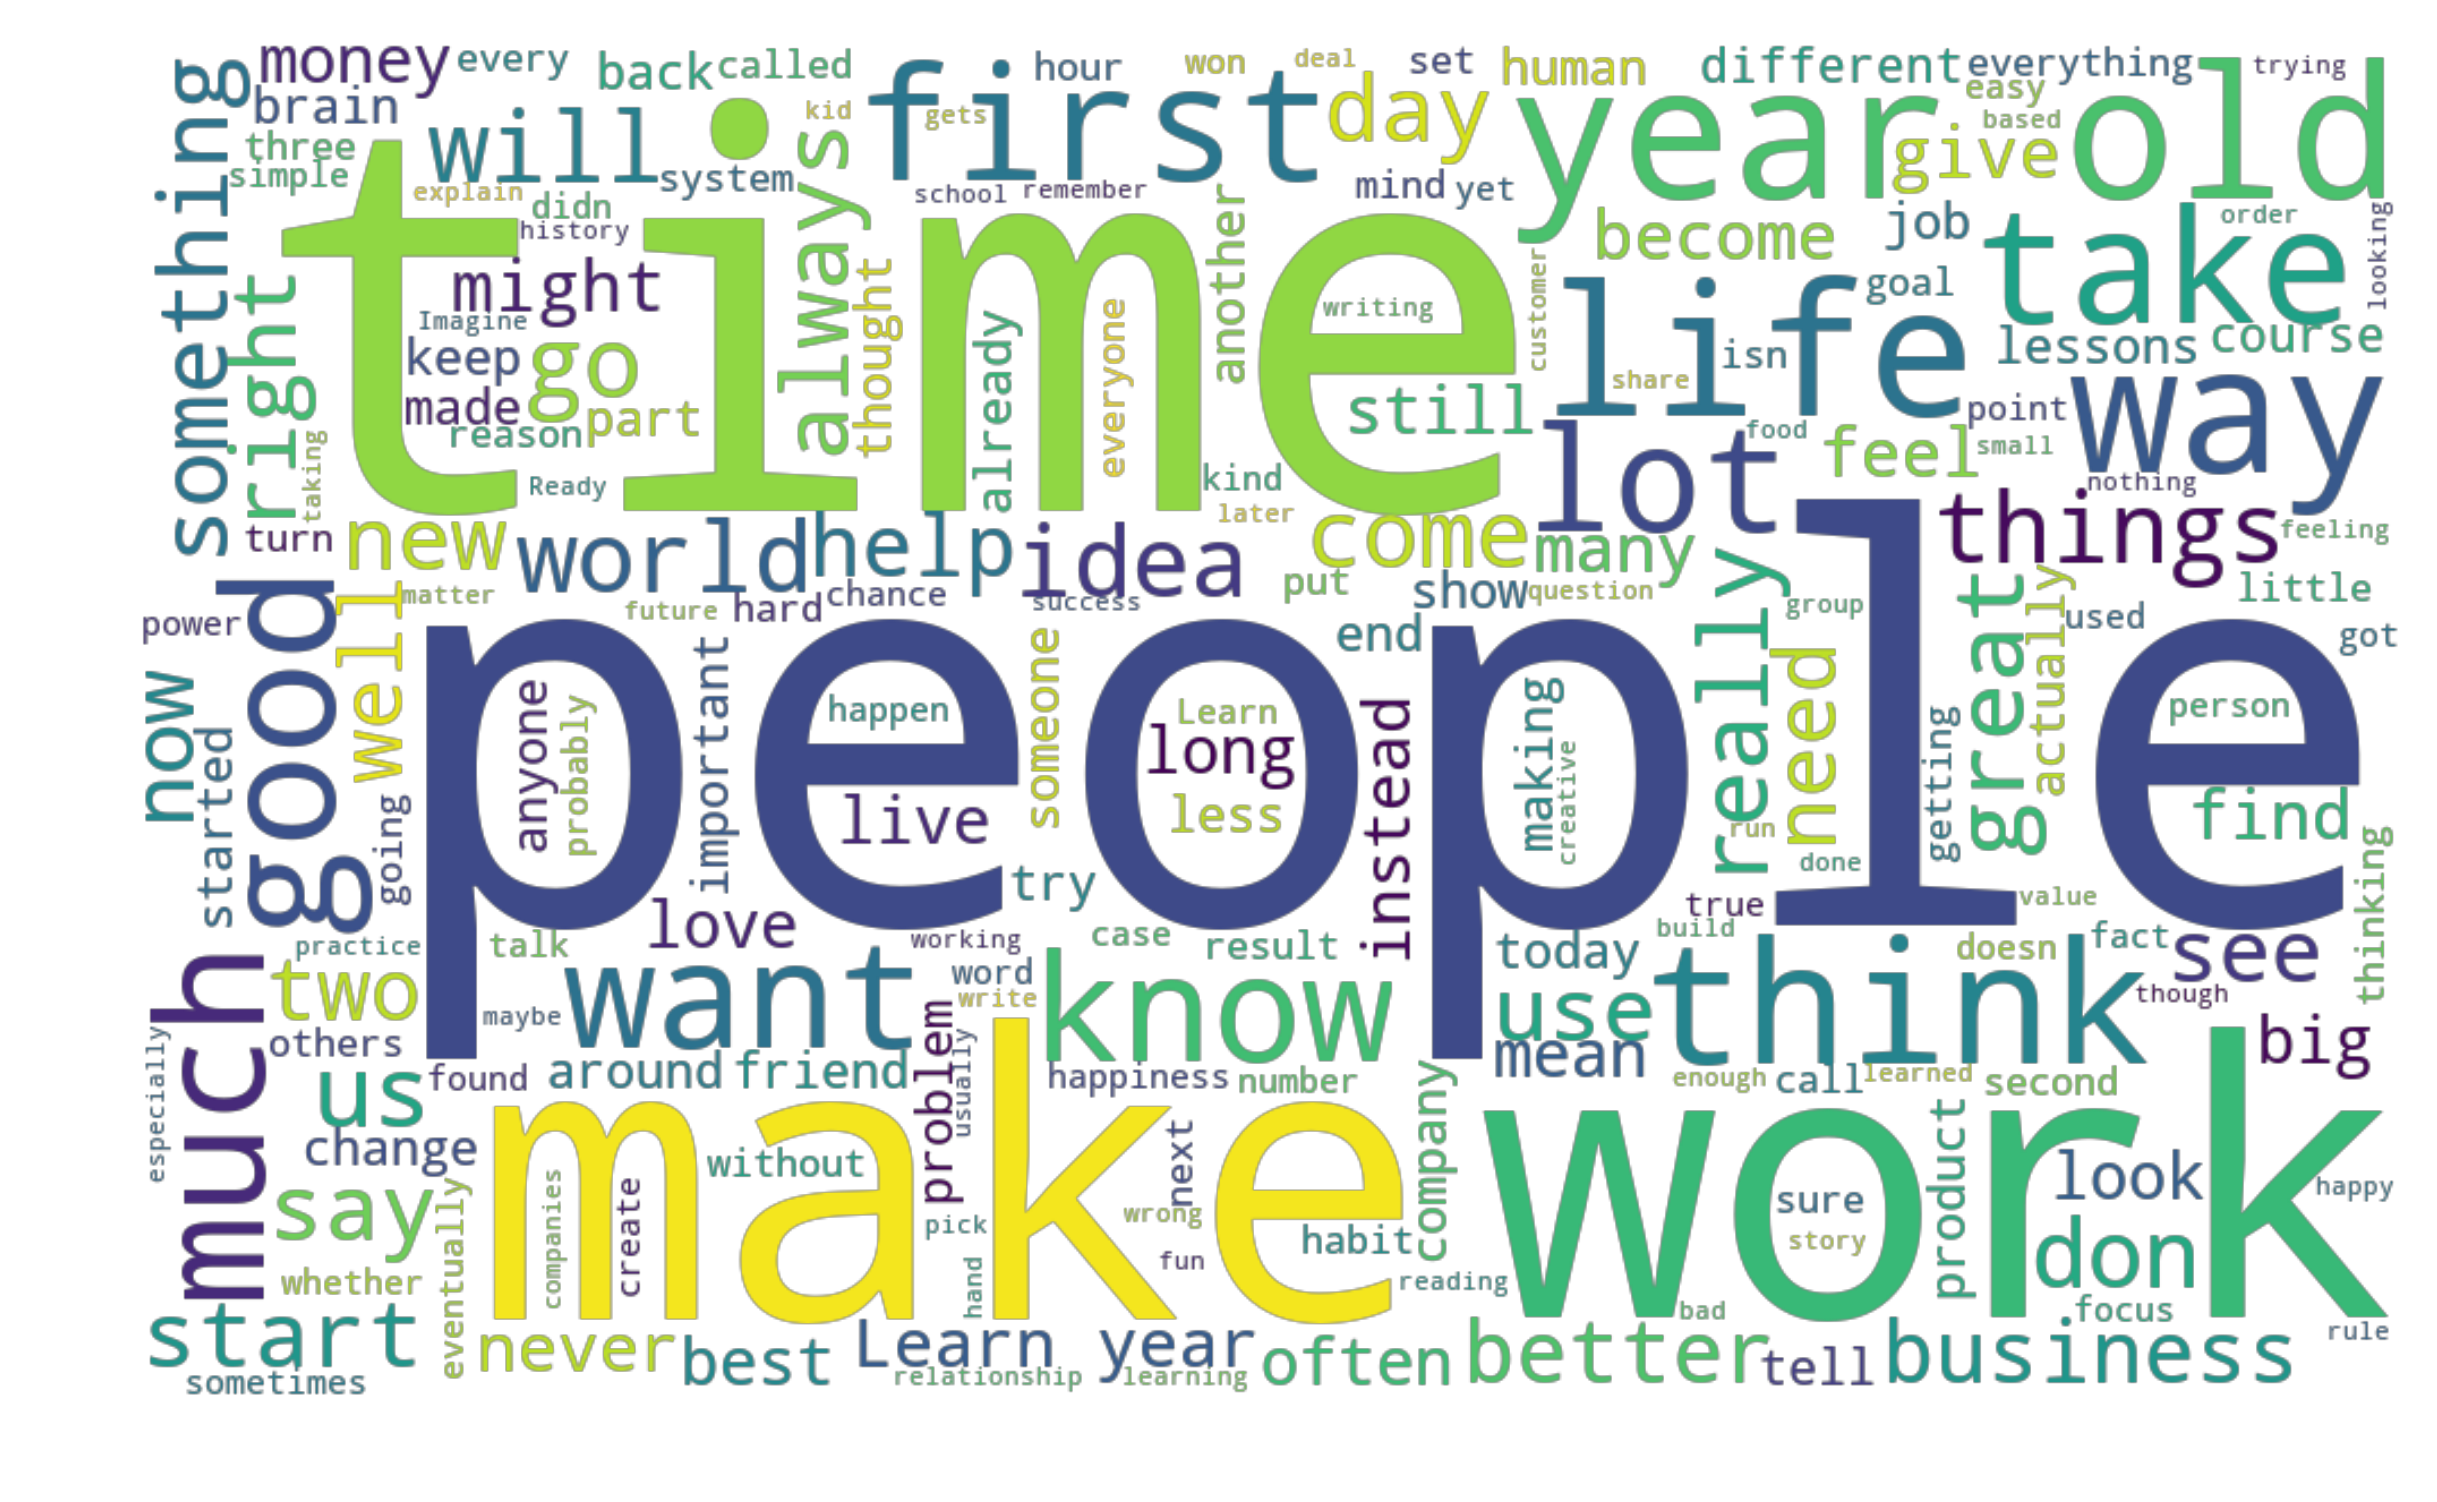

In [14]:
plot_texts(texts)